In [4]:
def create_debruijn(string, k):
    """Creates a list holding, for each k-mer, its prefix amnd suffix
    k-1 mer in a pair."""
    edges = []
    nodes = set()
    for i in range(len(string)-k+1):
        edges.append((string[i:i+k-1], string[i+1:i+k]))
        nodes.add(string[i:i+k-1])
        nodes.add(string[i+1:i+k])
    return nodes, edges

In [5]:
nodes, edges = create_debruijn("ACGCGTCG", 3)
print(nodes)
print(edges)


{'GT', 'GC', 'TC', 'AC', 'CG'}
[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [9]:
def debruijn_graph_visualization(string, k):
    """Visualize a directed multigraph using graphviz."""
    nodes, edges = create_debruijn(string, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for prefix, suffix in edges:
        dot_str += '  %s -> %s ;\n' % (prefix, suffix)
    return dot_str + '}\n'

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


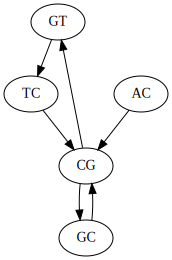

In [10]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

%load_ext gvmagic

dbg = debruijn_graph_visualization('ACGCGTCG', 3)

%dotstr dbg
